# Multiclass classification

## Learning objectives
- Understand how classification can be implemented when there are more than 2 classes
- Implement a multiclass classifier from scratch

## Intro - Binary classification vs multiclass classification

In binary classification the output must be either true or false. Either the example falls into this class, or it doesn't. We have seen that we can represent this by our model having a single output node whose value is forced between 0 and 1, and as such represents a confidence in the fact that the example belongs to the positive class. Alternatively, still for binary classification, we could have two output nodes, where the value of the first represents the confidence that the input belongs to the positive class (true/class 1) and the value of the second represents the confidence that the input belongs to the negative class (false/class 2). In this case, the values of each output node must be positive and they must sum to 1, because this output layer represents a probability distribution over the output classes. 

# Softmax

![](./images/binary-class.jpg)

In the case where we have two nodes to represent true and false, we can think about it as having trained two models.

Treating true and false as separate classes with separate output nodes shows us how we can extend this idea to do multiclass classification; we simply add more nodes and ensure that their values are positive and sum to one.

![](./images/multiclass.jpg)

### What function can we use to convert the output layer into a distribution over classes?

The **softmax function** exponentiates each value in a vector to make it positive and then divides each of them by their sum to normalise them (make them sum to 1). This ensures that the vector then can be interpreted as a probability distribution.

![](./images/softmax.jpg)

## Differentiating the softmax

# show differentiation of softmax here

### Properties of softmax
- increasing the value of any entry decreases the value of all of the others, because the whole vector must always sum to one. 

Let's implement our own softmax function, and again include a boolean flag that will return the gradient.

In [5]:
import numpy as np

def softmax(z, label=None, grad=False):
    if grad:
        if not label:
            raise ValueError
        else:
            g = np.empty_like(z)
            for j in range(len(z)):
                if j == label:
                    g[j] = softmax(z)[label] * (1 - softmax(z)[label])
                else:
                    g[j] = - softmax(z)[label] * softmax(z)[j]
            return g
    return np.exp(z) / np.sum(np.exp(z))

x = np.random.rand(6)
print(x)
print(softmax(x))
print(sum(softmax(x)))
print(softmax(x, label=2, grad=True))

[0.74496453 0.27573738 0.97853402 0.54401469 0.59794373 0.1597154 ]
[0.1950541  0.12200351 0.24637296 0.15954518 0.16838553 0.10863872]
1.0
[-0.04805606 -0.03005837  0.18567332 -0.03930762 -0.04148564 -0.02676564]


## The cross entropy loss function

In the BCE loss function, the one line equation contained all of the "switches" that it needs to turn on or off certain terms of the equation.
This was possible because in binary classification, the labels will certainly either be 0 or 1.

In multiclass classification however, these switches cannot be contained in a single line.

An appropriate loss function to use for multiclass classification is the cross entropy loss function.
Like BCE loss, cross entropy uses the same term: the negative natural log of the output probability to penalise outputs exponentially as they stray from the ground truth.
Not all of the terms are needed.
By increasing the value of one element of the output of a softmax, the others must decrease, because the whole vector has to sum to 1.
So if we focus on increasing the correct class likelihood, then we will implicitly be decreasing the incorrect class likelihood.

Let's implement the cross entropy loss function.

In [6]:
def CrossEntropyLoss(z, label):
    return - log(z[label])

Other than the final layer of the model where the softmax is applied and the loss function, the model and algorithm stay the same. 

Of course however, changing the model changes the gradient of the loss function with respect to the model parameters.
So we'll need to change the code that performs the parameter updates.

Below is the same code we wrote to perform binary classification

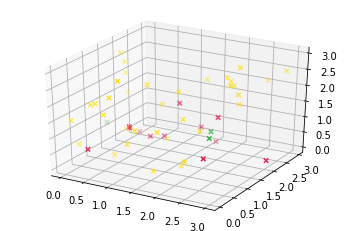

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from get_colors import colors


def make_binary_data(m=50): 
    X = 3*np.random.rand(m, 3) #sample from a normal distribution
    w = np.array([1, -2, 3])
    Xw = np.matmul(X, w.T)
    Y = np.zeros(X.shape[0])
    Y[Xw > 0] = 1#np.sum(Wx,axis=1)
    Y[Xw > 1] = 2
    return X, Y #returns X (the input) and Y (labels)

def plot_data(X, Y):
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    for y in range(3):
        x = X[Y == y]
        ax1.scatter(x[:, 0], x[:, 1], x[:, 2], c=colors[y], marker='x')
    # ax1.xlabel('X')
    # ax1.ylabel('Y')
    # ax1.grid()
    plt.show()
    
X, Y = make_binary_data()
plot_data(X, Y)

In [7]:
import matplotlib.pyplot as plt

class Classifier:
    def __init__(self, n_features):
        self.w = np.random.rand(n_features)
        self.b = np.random.rand()
    
    def __call__(self, x):
        x = self.w * x + self.b
        x = softmax(x)
        return x

    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b    

    def calc_deriv(self, x, y_hat, label):
        m = len(Y) # m = number of examples
        diffs = y_hat - label # calculate errors
        dzdb = 1
        dzdw = x
        dhdz = softmax(y_hat, label, grad=True)
        dhdw = dhdz * dzdw
        dhdb = dhdz * dzdb
        return dhdw, dhdb

learning_rate = 0.001

H = Classifier(n_features=1)

# PLOT OUR HYPOTHESIS BEFORE TRAINING
plt.figure()
plt.title('Before training')
plt.ylabel('Label')
plt.xlabel('Features')
plt.scatter(X, H(X), label='predictions')
plt.scatter(X, Y, c='r', marker='x', label='ground truth')
plt.legend()
plt.show()


epochs = 1000
losses = []
for epoch in range(epochs):
    epoch_losses = []
    for x, y in zip(X, Y):
        prediction = H(x)
        print(y)

        dds
        loss = CrossEntropyLoss(prediction, y)
        epoch_losses.append(loss)
        dhdw, dhdb = H.calc_deriv(x, prediction, y)
        dLdh = CrossEntropyLoss(prediction, y, grad=True)
        dLdw = dLdh * dhdw
        dLdb = dLdh * dhdb
        new_w = H.w - learning_rate * dLdw
        new_b = H.b - learning_rate * dLdb
        H.update_params(new_w, new_b)
    losses.append(np.mean(epoch_losses))
        


NameError: name 'X' is not defined

## Summary
- multiclass classification requires a different loss function 
- softmax is a differentiable function that turns a vector of real numbers into a probability distribution

## Next steps
- 
